# Photo Classifier: Model evaluation

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
from file_io import load_pickle_file
from constants import *
from image_transforms import IMAGE_TRANSFORMS
from interpreters.utils import get_interpreter

In [4]:
import random
random.seed(42)

In [5]:
DATA_SET = 'test'

## Load model and data

In [6]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [7]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [8]:
y_pred, probabilities = model.predict(x, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [9]:
Interpreter = get_interpreter(IS_MULTILABEL_CLASSIFICATION)
interpreter = Interpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [10]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.989247311827957

In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

Black bears      1.000000
Teddybears       0.965517
Grizzly bears    1.000000
dtype: float64

In [12]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

,Black bears,Teddybears,Grizzly bears
Black bears,1.0,0.000000,0.000000
Teddybears,0.0,0.965517,0.034483
Grizzly bears,0.0,0.000000,1.000000


In [13]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,Black bears propability,Teddybears propability,Grizzly bears propability,true,predicted,error,confidence
58,0.226167,0.309376,0.464457,[Teddybears],[Grizzly bears],0.460416,0.209470
18,0.637803,0.072849,0.289348,[Black bears],[Black bears],0.241465,0.493693
72,0.643021,0.000343,0.356636,[Black bears],[Black bears],0.237986,0.557672
40,0.324922,0.666665,0.008413,[Teddybears],[Teddybears],0.222223,0.570202
32,0.809370,0.014725,0.175905,[Black bears],[Black bears],0.127087,0.727570


In [14]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,Black bears propability,Teddybears propability,Grizzly bears propability,true,predicted,error,confidence
58,0.226167,0.309376,0.464457,[Teddybears],[Grizzly bears],0.460416,0.209470
18,0.637803,0.072849,0.289348,[Black bears],[Black bears],0.241465,0.493693
72,0.643021,0.000343,0.356636,[Black bears],[Black bears],0.237986,0.557672
40,0.324922,0.666665,0.008413,[Teddybears],[Teddybears],0.222223,0.570202
32,0.809370,0.014725,0.175905,[Black bears],[Black bears],0.127087,0.727570


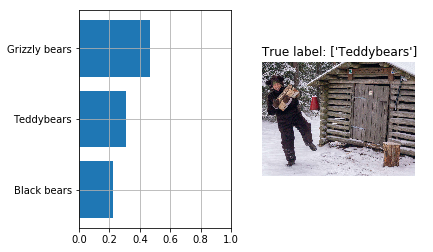

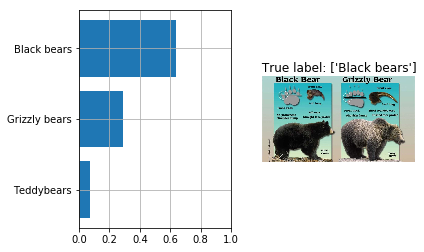

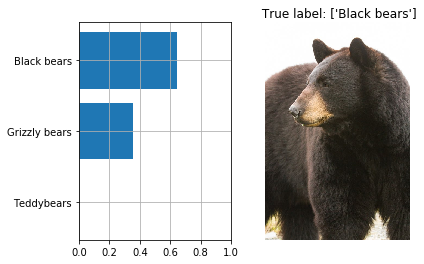

In [15]:
interpreter.plot_most_incorrect_samples(3)

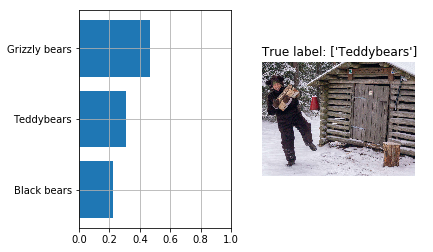

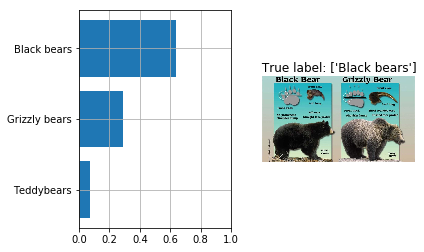

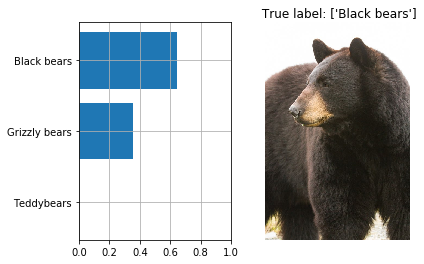

In [16]:
interpreter.plot_most_uncertain_samples(3)

In [17]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=92), Output()), _do…